# Mini Project 1

### Luis Pereda

In [1]:
# This is for ECE580: Intro to machine learning Spring 2020 in Duke
# This is translated to Python from show_chanWeights.m file provided by Prof. Li by 580 TAs

# import ext libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# from scipy.misc import imread   # Make Sure you install the required packages like Pillow and scipy

def imgRead(fileName):
    """
    load the input image into a matrix
    :param fileName: name of the input file
    :return: a matrix of the input image
    Examples: imgIn = imgRead('lena.bmp')
    """
    imgIn = plt.imread(fileName)
    return imgIn


def imgShow(imgOut):
    """
    show the image saved in a matrix
    :param imgOut: a matrix containing the image to show
    :return: None
    """
    imgOut = np.uint8(imgOut)
    plt.figure(figsize=[20,20])
    plt.imshow(imgOut, cmap = 'gray')


def imgRecover(imgIn, blkSize, numSample):
    """
    Recover the input image from a small size samples
    :param imgIn: input image
    :param blkSize: block size
    :param numSample: how many samples in each block
    :return: recovered image
    """
    ##### Your Implementation here

    return None

"""
if __name__ == '__main__':
    a = imgRead('lena.bmp')
    print(np.shape(a))
    imgShow(a)
    print(a)
"""

"\nif __name__ == '__main__':\n    a = imgRead('lena.bmp')\n    print(np.shape(a))\n    imgShow(a)\n    print(a)\n"

In [2]:
fishing_boat = imgRead("fishing_boat.bmp")

In [3]:
nature = imgRead("nature.bmp")

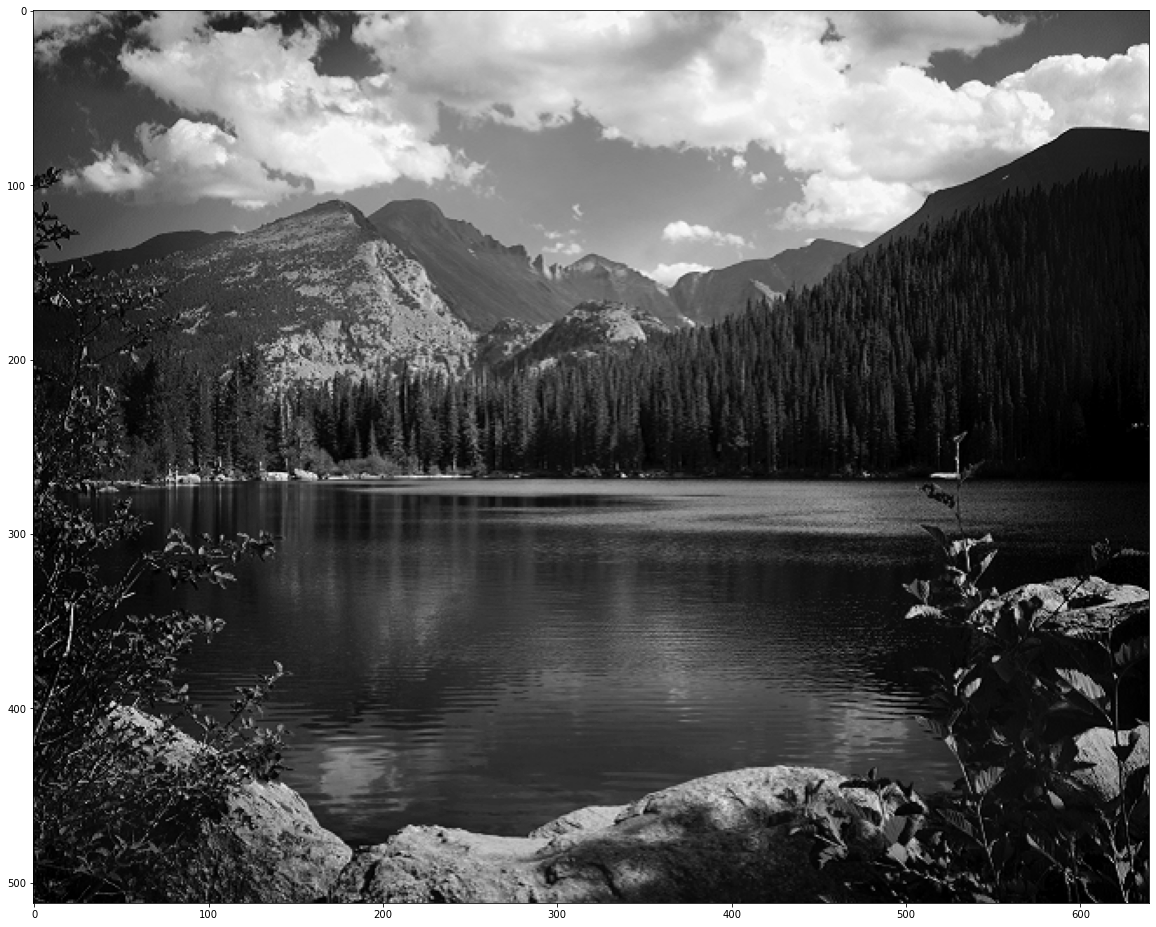

In [4]:
imgShow(nature)

In [5]:
(fishing_boat[1:3, :4])

array([[177, 176, 177, 178],
       [176, 176, 176, 178]], dtype=uint8)

In [6]:
import random

def sample_block(block, num_samples):
#     block = blocks[1]
    indices = np.linspace(0, np.prod(block.shape) - 1, np.prod(block.shape))
    random.shuffle(indices)
    indices = indices[0:(len(indices) - num_samples)]
    indices = [int(x) for x in indices]
    ret = block.flatten()
    ret[indices] = 0
    ret = ret.reshape([block.shape[0], block.shape[1]])
    return ret

In [7]:
def get_blocks_from_image(image, N):
    blocks = []
    for i in range(image.shape[0] // N):
        for j in range(image.shape[1] // N):
            blocks.append(image[(i * N):((i + 1) * N), (j * N):((j + 1) * N)])
    return np.array(blocks)

In [8]:
blocks = get_blocks_from_image(fishing_boat, 8)
blocks.shape

(600, 8, 8)

In [9]:
fishing_boat.shape

(200, 192)

In [10]:
x = fishing_boat.shape[1] / 8
x.is_integer()

True

In [11]:
# Get sampled image where num_samples are taken from each NXN block
def get_sampled_image(image, N, num_samples):
    blocks = get_blocks_from_image(image, N)
    
    block_count = 0
    new_blocks = np.ndarray(image.shape)
    col_reps = image.shape[1] / N
    
    if not col_reps.is_integer():
        print("Cannot split image into {} by {} blocks, select a new value N".format(N, N))
    
    else:
        col_reps = int(col_reps)
        for block in blocks:
            sample = sample_block(block, num_samples)

            # For row in block
            for i in range(block.shape[0]):
                new_blocks[N * (block_count // col_reps) + i][N * (block_count % col_reps) : N * (block_count % col_reps + 1)] = sample[i]
            block_count += 1
        return new_blocks

In [12]:
new_blocks = get_sampled_image(nature, 16, 220)

In [13]:
list(np.subtract(nature, new_blocks))

[array([  0.,   0.,   0., 160.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 162., 159.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0., 146.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 145.,
          0.,   0.,   0.,   0., 107.,   0., 133.,   0., 127., 128.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,  60.,   0., 101.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  66.,   0., 127.,   0.,   0.,   0.,   0.,   0.,   0.,
          0., 163.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 166.,   0.,
        166.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 148.,
        143.,   0., 160.,   0.,   0., 139.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0., 170.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
        105.,   0.,   0.,  44.,   0., 

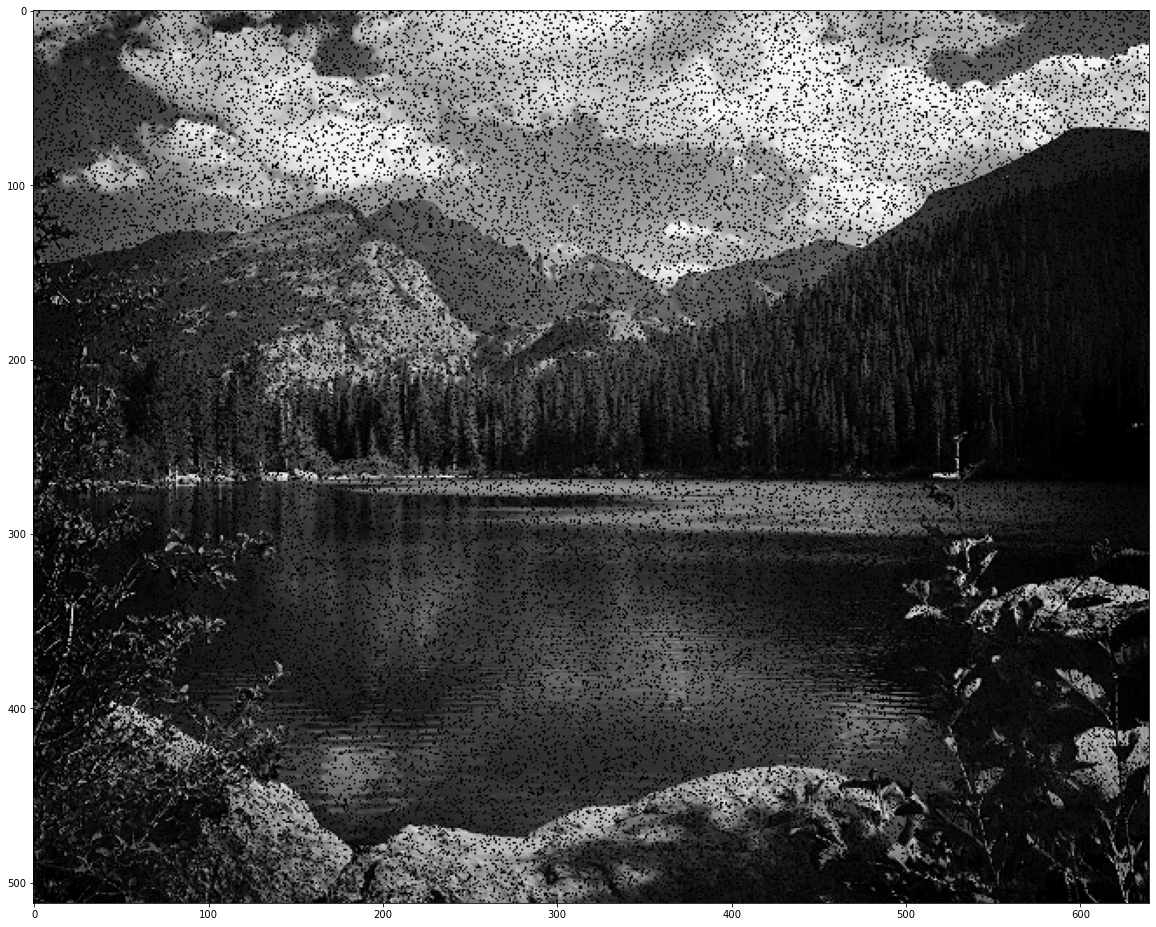

In [14]:
imgShow(new_blocks)

Up to this point have shown I can complete up to the first checkpoint: able to split image into NXN blocks and sample n samples from any of these blocks. 

In [15]:
from sklearn.linear_model import Lasso

In [16]:
def rasterize(mat):
    return mat.flatten()

In [17]:
def find_T_col(u, v, P, Q):
    T = np.ndarray([P,Q])
    for x in range(1, P + 1):
        for y in range(1, Q + 1):
            if u == 1:
                alpha = np.sqrt(1/P)
            else:
                alpha = np.sqrt(2/P)
            if v == 1: 
                beta = np.sqrt(1/Q)
            else:
                beta = np.sqrt(2/Q)
            term1 = np.cos(np.pi * (2 * x - 1) * (u - 1) / (2 * P))
            term2 = np.cos(np.pi * (2 * y - 1) * (v - 1) / (2 * Q))

            T[x-1][y-1] = alpha * beta * term1 * term2
    return rasterize(T)

In [18]:
def find_T_matrix(P, Q):
    T_mat = []
    for u in range(1, P + 1):
        for v in range(1, Q + 1):
            T_col = find_T_col(u, v, P, Q)
            T_mat.append(T_col)
    return np.transpose(np.array(T_mat).reshape([P ** 2, Q ** 2]))

In [19]:
T = find_T_matrix(8, 8)

In [20]:
fishing_boat_blocks = get_blocks_from_image(fishing_boat, 8)
block = sample_block(fishing_boat_blocks[0], 10)
block = rasterize(block)

In [21]:
B = np.array([x for x in block if x != 0])
A = np.array([row for row, x in zip(T, block) if x != 0])

In [22]:
DC = A[:, 0]
A = A[:, 1:]

In [23]:
DCT_coef_predictor = Lasso(alpha = 1e-3)
DCT_coef_predictor.fit(X = A, y = B.flatten())

Lasso(alpha=0.001)

In [24]:
DC_term = [DCT_coef_predictor.intercept_ / DC[0]]

In [25]:
DCT_coefs = np.array(DC_term + list(DCT_coef_predictor.coef_))

In [26]:
len(DCT_coefs)

64

In [27]:

def find_DCT_coefs(block, N, lambda_choice):
    T = find_T_matrix(N, N)
#     image_blocks = get_blocks_from_image(image, N)
#     block = sample_block(fishing_boat_blocks[0], num_samples)
#     block = rasterize(block)
    B = block
    A = np.array([row for row, x in zip(T, block) if x != 0])
    DC = A[:, 0]
    A = A[:, 1:]
    DCT_coef_predictor = Lasso(alpha = lambda_choice)
    DCT_coef_predictor.fit(X = A, y = B.flatten())
    DC_term = [DCT_coef_predictor.intercept_ / DC[0]]
    DCT_coefs = np.array(DC_term + list(DCT_coef_predictor.coef_))
    return DCT_coefs

Up to this point done with checkpoint 2: can estimate DCT for a single block 

In [57]:
import random

def find_training_and_test_set(block, S):
    block = rasterize(block)
    b = pd.DataFrame(np.array([x for x in block if x != 0]))
    
    indices = set(range(0, S))
    test_indices = set(random.sample(range(0, S), S // 6))
    train_indices = indices - test_indices
    
    train_values = b.iloc[np.sort(list(train_indices))]
    test_values = b.iloc[np.sort(list(test_indices))]
    return train_values, test_values, test_indices

In [58]:
def find_T_rows(test_indices, N):
    T = find_T_matrix(N, N)
    T = pd.DataFrame(T)
    T = T.iloc[np.sort(list(test_indices))]
    return T.to_numpy()

In [59]:
from sklearn.metrics import mean_squared_error as MSE
     
def find_lambda(block, num_samples, N):
    lambda_candidates = np.logspace(-6, 6, 60)
    min_mse = 100000000

    for alpha_choice in lambda_candidates:
        train_values, test_values, test_indices = find_training_and_test_set(block, num_samples)
        train_arr = train_values.to_numpy().flatten()
        DCT_coefs = find_DCT_coefs(train_arr, N, alpha_choice)
        T_rows = find_T_rows(test_indices, N)
        predictions = np.matmul(T_rows, DCT_coefs)
        mse = MSE(test_values, predictions)
        if(mse < min_mse):
            min_mse = mse
            ideal_lambda = alpha_choice
    return ideal_lambda

In [60]:
block = sample_block(fishing_boat_blocks[0], 40)
lamb = find_lambda(block, 40, 8)

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.406e-02, tolerance: 1.371e-02
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e-02, tolerance: 1.398e-02
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

In [32]:
block = rasterize(block)
b = np.array([x for x in block if x != 0])
b

array([176, 179, 178, 181, 179, 177, 178, 178, 178, 177, 176, 176, 178,
       177, 178, 177, 177, 178, 177, 177, 179, 182, 176, 181, 180, 179,
       177, 184, 179, 178, 182, 185, 178, 179, 178, 178, 179, 181, 183,
       182], dtype=uint8)

In [33]:
DCT_coefs = find_DCT_coefs(b, 8, lamb)

In [34]:
DCT_coefs

array([ 1.42849153e+03, -3.59906241e+00,  0.00000000e+00, -0.00000000e+00,
        8.04663852e-01, -0.00000000e+00, -0.00000000e+00, -8.29065804e-01,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -4.76829950e+00,  3.27437075e+00, -2.19293323e+00, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        3.60530344e+00, -0.00000000e+00, -0.00000000e+00, -1.43652563e+00,
        0.00000000e+00,  1.21796571e+00, -2.12226137e+00, -0.00000000e+00,
        9.00365300e-01,  0.00000000e+00, -0.00000000e+00, -1.45887315e+00,
        1.34211629e+00,  0.00000000e+00, -0.00000000e+00, -1.22343218e+00,
        0.00000000e+00, -0.00000000e+00, -4.60417168e-01,  0.00000000e+00,
       -0.00000000e+00, -

In [35]:
def find_empty_indices(block):
    b = block.flatten()
    indices = [index for index, x in zip(range(len(b)), b) if x == 0]
    return indices

In [36]:
empties = find_empty_indices(block)

In [37]:
block = rasterize(block)
T_rows = find_T_rows(find_empty_indices(block), 8)
reconstructed_pixels = np.matmul(T_rows, DCT_coefs)

In [38]:
reconstructed_block = pd.DataFrame(block)
reconstructed_block.iloc[empties] = reconstructed_pixels
reconstructed_block = reconstructed_block.to_numpy().reshape([8, 8])

In [72]:
# NxN block 
def reconstruct_block(block, lamb, N):
    block = rasterize(block)
    b = np.array([x for x in block if x != 0])
    DCT_coefs = find_DCT_coefs(b, N, lamb)
    empties = find_empty_indices(block)
    
    T_rows = find_T_rows(empties, N)
    reconstructed_pixels = np.matmul(T_rows, DCT_coefs)
    
    reconstructed_block = pd.DataFrame(block)
    reconstructed_block.iloc[empties] = reconstructed_pixels
    reconstructed_block = reconstructed_block.to_numpy().reshape([N, N])
    
    return reconstructed_block

In [73]:
block = sample_block(fishing_boat_blocks[0], 40)
lamb = find_lambda(block, 40, 8)
new = reconstruct_block(block, lamb, 8)

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.569e-02, tolerance: 1.550e-02
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.227e-02, tolerance: 1.463e-02
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

At this point able to reconstruct a block using cross-validation to find a lambda for LASSO regression

In [74]:
# fishing_boat_blocks = get_blocks_from_image(fishing_boat, 8)
# reconstructed_blocks = []

# for image_block in fishing_boat_blocks:
#     block = sample_block(image_block, 40)
#     lamb = find_lambda(block, 40, 8)
#     reconstructed = reconstruct_block(block, lamb, 8)
#     reconstructed_blocks.append(reconstructed)

In [75]:
# reconstructed_blocks = np.array(reconstructed_blocks).reshape([600, 8, 8])
# reconstructed_blocks.shape

In [76]:
# block_count = 0
# new_blocks = np.ndarray(fishing_boat.shape)
# col_reps = fishing_boat.shape[1] / 8

# col_reps = int(col_reps)
# for block in reconstructed_blocks:

#     # For row in block
#     for i in range(block.shape[0]):
#         new_blocks[8 * (block_count // col_reps) + i][8 * (block_count % col_reps) : 8 * (block_count % col_reps + 1)] = block[i]
#     block_count += 1

In [77]:
def reconstruct_image(image, N, num_samples):
    image_blocks = get_blocks_from_image(image, N)
    reconstructed_blocks = []
    
    for image_block in image_blocks:
        block = sample_block(image_block, num_samples)
        lamb = find_lambda(block, num_samples, N)
        reconstructed = reconstruct_block(block, lamb, N)
        reconstructed_blocks.append(reconstructed)
    reconstructed_blocks = np.array(reconstructed_blocks).reshape([np.prod(image.shape) / N ** 2, N, N])
    
    block_count = 0
    new_blocks = np.ndarray(image.shape)
    col_reps = image.shape[1] / N

    col_reps = int(col_reps)
    for block in reconstructed_blocks:

        # For row in block
        for i in range(block.shape[0]):
            new_blocks[N * (block_count // col_reps) + i][N * (block_count % col_reps) : N * (block_count % col_reps + 1)] = block[i]
        block_count += 1
    return new_blocks

In [78]:
nature_reconstructed = reconstruct_image(nature, 16, 200)

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.396e+01, tolerance: 2.269e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.681e+01, tolerance: 2.069e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.825e+01, tolerance: 1.315e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.289e+01, tolerance: 1.191e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.094e+00, tolerance: 4.716e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.238e+01, tolerance: 4.019e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.323e+01, tolerance: 4.211e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.673e+01, tolerance: 4.182e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.684e+02, tolerance: 5.368e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.324e+01, tolerance: 5.079e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.269e+00, tolerance: 1.157e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.974e+00, tolerance: 1.020e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.111e-01, tolerance: 1.654e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.067e-01, tolerance: 1.703e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.137e-01, tolerance: 5.819e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.054e+00, tolerance: 6.210e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.200e+00, tolerance: 1.277e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.812e+00, tolerance: 1.329e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.154e+00, tolerance: 1.664e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.164e+00, tolerance: 1.686e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.420e+00, tolerance: 2.560e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.310e+00, tolerance: 2.505e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.431e+00, tolerance: 2.762e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.195e+00, tolerance: 2.624e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.387e+02, tolerance: 2.767e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.388e+01, tolerance: 2.721e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.043e+00, tolerance: 6.488e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.137e-01, tolerance: 1.834e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.522e-01, tolerance: 1.771e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.456e-01, tolerance: 1.721e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.396e+00, tolerance: 7.034e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.471e+00, tolerance: 6.028e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.127e+01, tolerance: 7.582e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.221e+01, tolerance: 8.052e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.308e+00, tolerance: 4.038e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.672e+00, tolerance: 4.239e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.382e+01, tolerance: 1.889e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.541e+01, tolerance: 1.933e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.468e+01, tolerance: 1.245e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.591e-01, tolerance: 5.298e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.451e+00, tolerance: 3.809e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.919e+00, tolerance: 3.747e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.719e+00, tolerance: 1.849e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.216e+00, tolerance: 1.894e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.497e+01, tolerance: 9.895e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.844e+01, tolerance: 9.510e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.910e-01, tolerance: 3.984e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.302e+00, tolerance: 4.565e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.886e+01, tolerance: 2.148e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.889e+01, tolerance: 1.996e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.694e+00, tolerance: 3.351e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.278e+00, tolerance: 3.212e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.698e+01, tolerance: 1.440e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.819e+01, tolerance: 1.472e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.053e+02, tolerance: 8.786e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.153e+02, tolerance: 7.674e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.944e-01, tolerance: 5.939e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.229e+00, tolerance: 6.275e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.117e+01, tolerance: 3.507e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.305e+01, tolerance: 3.824e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.233e+00, tolerance: 5.119e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.322e+00, tolerance: 5.028e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.785e+00, tolerance: 5.650e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.312e+00, tolerance: 5.688e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.997e+01, tolerance: 4.720e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.514e+01, tolerance: 2.023e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.042e+00, tolerance: 1.240e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.358e+00, tolerance: 1.254e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.390e+00, tolerance: 9.417e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.315e+00, tolerance: 1.020e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.351e-01, tolerance: 2.506e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.372e-01, tolerance: 2.455e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 9.409e+00, tolerance: 3.543e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.289e+01, tolerance: 3.680e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.493e-01, tolerance: 5.709e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.743e-01, tolerance: 6.098e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.040e+00, tolerance: 2.483e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.827e+00, tolerance: 2.809e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.632e+00, tolerance: 2.538e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.323e+00, tolerance: 2.657e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.458e+02, tolerance: 7.338e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 8.347e+01, tolerance: 6.970e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.111e+00, tolerance: 1.620e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.379e+00, tolerance: 1.656e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.402e+00, tolerance: 1.934e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.292e+00, tolerance: 1.791e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.218e+00, tolerance: 5.347e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.585e+00, tolerance: 4.969e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.330e-01, tolerance: 9.690e-02
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.581e+00, tolerance: 5.992e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.303e+01, tolerance: 1.635e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.290e+01, tolerance: 1.766e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.936e+00, tolerance: 2.373e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.488e+00, tolerance: 2.528e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.658e+00, tolerance: 3.325e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.946e+00, tolerance: 3.547e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.642e+00, tolerance: 3.279e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.294e+00, tolerance: 3.375e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+01, tolerance: 6.196e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.765e+01, tolerance: 5.552e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.928e+00, tolerance: 2.616e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.640e+00, tolerance: 2.757e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.108e+00, tolerance: 4.286e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.973e-01, tolerance: 3.963e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.225e-01, tolerance: 3.384e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.652e-01, tolerance: 3.229e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.237e+00, tolerance: 7.299e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.458e+00, tolerance: 7.895e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.236e+00, tolerance: 8.624e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.357e+00, tolerance: 1.185e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.116e+01, tolerance: 2.605e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.027e+00, tolerance: 2.319e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.731e+00, tolerance: 8.130e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.246e+00, tolerance: 7.939e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.767e+00, tolerance: 1.899e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.329e+00, tolerance: 2.156e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.645e+00, tolerance: 2.731e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.947e+00, tolerance: 2.580e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.772e+01, tolerance: 1.454e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.452e+00, tolerance: 5.819e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.578e+01, tolerance: 1.247e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.192e+01, tolerance: 1.388e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.562e+00, tolerance: 9.981e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.976e+00, tolerance: 8.387e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.878e+00, tolerance: 3.302e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.302e+00, tolerance: 2.940e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.920e-01, tolerance: 4.368e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.713e-01, tolerance: 4.560e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.951e+01, tolerance: 7.002e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.464e+01, tolerance: 6.846e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.213e+01, tolerance: 1.590e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.035e+01, tolerance: 1.651e+01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.418e+00, tolerance: 3.340e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.455e+00, tolerance: 3.418e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+01, tolerance: 5.692e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.815e+00, tolerance: 5.575e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.741e+00, tolerance: 1.347e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.542e+00, tolerance: 1.203e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.927e+00, tolerance: 7.728e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.141e+00, tolerance: 8.444e-01
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.716e+00, tolerance: 3.906e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.385e+00, tolerance: 3.908e+00
  model = cd_fast.enet_coordinate_descent(
/Users/luispereda/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasi

IndexError: positional indexers are out-of-bounds